In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(suppress=True)

import os
import scanpy as sc
import matplotlib.pyplot as plt
import torch

%reload_ext autoreload
%autoreload 2

In [2]:
adata = sc.read_h5ad('./datasets/CordBlood/adata_meta.h5ad')
adata

AnnData object with n_obs × n_vars = 24885 × 3462
    obs: 'Timepoint', 'gfp_late', 'GFP', 'Tissue', 'Batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'label_full', 'label_red', 'clones', 'time_label_full', 'time_label_red', 'Meta clones', 'leiden', 'transferred_labels', 'prediction_score_max', 'dpt_pseudotime', 'def_lab'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_removed'
    uns: 'Batch_colors', 'Timepoint_colors', 'def_lab_colors', 'diffmap_evals', 'final_lab_colors', 'hvg', 'iroot', 'label_full_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'pred_corr_colors', 'rank_genes_groups', 'transferred_labels_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'seurat'
    obsp: 'connectivities', 'distances'

In [16]:
np.where(np.array(adata.layers['seurat'].todense()) > 0, np.array(adata.layers['seurat'].todense()), 0)

array([[0.07157625, 0.06856335, 0.        , ..., 0.20015521, 0.11099344,
        0.01287536],
       [0.49242494, 1.2774742 , 0.06127305, ..., 0.00127693, 0.        ,
        0.00197274],
       [0.21656913, 0.20425816, 0.        , ..., 0.07298686, 0.        ,
        0.0024092 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [3]:
adata = adata[adata.obs[adata.obs['Meta clones'] != '-1.0'].index, :]
adata

View of AnnData object with n_obs × n_vars = 11064 × 3462
    obs: 'Timepoint', 'gfp_late', 'GFP', 'Tissue', 'Batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'label_full', 'label_red', 'clones', 'time_label_full', 'time_label_red', 'Meta clones', 'leiden', 'transferred_labels', 'prediction_score_max', 'dpt_pseudotime', 'def_lab'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'gene_removed'
    uns: 'Batch_colors', 'Timepoint_colors', 'def_lab_colors', 'diffmap_evals', 'final_lab_colors', 'hvg', 'iroot', 'label_full_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase_colors', 'pred_corr_colors', 'rank_genes_groups', 'transferred_labels_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'seurat'
    obsp: 'connectivities', 'distances'

In [6]:
np.unique(adata.obs['def_lab'].values)

array(['DC', 'DC precursor ', 'Early Erythroid', 'HSC_MPP',
       'Late Erythroid', 'MEMP', 'Mast cell', 'Mid Erythroid',
       'Mono precur', 'Monocyte', 'NMP'], dtype=object)

In [4]:
sum(adata.obs['def_lab'] == 'DC precursor')

0

In [5]:
adata.obs[(adata.obs['def_lab'] == 'DC precursor') & (adata.obs['Meta clones'] == '3')]

,Timepoint,gfp_late,GFP,Tissue,Batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,S_score,...,label_red,clones,time_label_full,time_label_red,Meta clones,leiden,transferred_labels,prediction_score_max,dpt_pseudotime,def_lab


In [70]:
adata.obs.groupby(['Meta clones', 'def_lab']).size().unstack(fill_value=0).T

/tmp/ipykernel_1672281/1030361185.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(['Meta clones', 'def_lab']).size().unstack(fill_value=0).T


Meta clones,0,1,2,3,4,5,6,7,8,9,10,11,12,13
def_lab,,,,,,,,,,,,,,
DC,0,0,11,140,0,0,2,2,5,0,0,0,40,0
DC precursor,0,0,9,187,3,0,0,2,1,0,0,0,58,0
Early Erythroid,108,193,0,0,31,513,0,0,6,11,1,0,0,47
HSC_MPP,0,0,24,124,3,3,7,8,41,0,0,0,3,0
Late Erythroid,25,18,0,16,9,154,1,0,17,0,0,0,0,5
MEMP,30,21,0,1,17,101,1,0,2,60,2,0,0,7
Mast cell,56,66,0,11,398,365,7,12,275,60,117,1,0,6
Mid Erythroid,315,79,1,7,43,890,0,0,123,10,2,0,0,4
Mono precur,0,1,89,201,0,16,12,26,418,0,0,6,10,0


In [6]:
adata = sc.read_h5ad('./datasets/Weinreb/adata_used.h5ad')
adata

AnnData object with n_obs × n_vars = 44756 × 5000
    obs: 'Time_point', 'Population', 'Annotation', 'Well', 'time_cat', 'leiden', 'comb', 'label_man', 'clones', 'meta_clones'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Annotation_colors', 'Time_point_colors', 'comb_colors', 'hvg', 'label_man_colors', 'label_man_sizes', 'leiden', 'leiden_colors', 'log1p', 'meta_clones_colors', 'neighbors', 'paga', 'pca', 'time_cat_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
adata.var_names_make_unique()
adata = adata[adata.obs['meta_clones'] != '-1.0', :]
idx_mt = [not gene.startswith('mt-') for gene in adata.var.index]
adata = adata[:, idx_mt]
adata

View of AnnData object with n_obs × n_vars = 44756 × 4995
    obs: 'Time_point', 'Population', 'Annotation', 'Well', 'time_cat', 'leiden', 'comb', 'label_man', 'clones', 'meta_clones'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Annotation_colors', 'Time_point_colors', 'comb_colors', 'hvg', 'label_man_colors', 'label_man_sizes', 'leiden', 'leiden_colors', 'log1p', 'meta_clones_colors', 'neighbors', 'paga', 'pca', 'time_cat_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Stacked Bar Distributions

In [ ]:
import os 
os.chdir('/ssd/users/mingzegao/clonaltrans/clonaltrans/')

path = '../trails/checkpoints/WeinrebDynamicRates/0301_112802/model_last.pt'
model = torch.load(path, map_location='cpu')
device = torch.device('cpu')

import os 
os.chdir('/ssd/users/mingzegao/clonaltrans/')

In [ ]:
model.N[:, :-1, :].sum([0, 2]).numpy()

In [ ]:
import colorcet as cc
import locale
locale.setlocale(locale.LC_ALL, '')

grouped = adata.obs.groupby(['meta_clones', 'label_man']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
legend_labels = proportions.columns

color_palette = sns.color_palette(cc.glasbey_dark, len(legend_labels))
ax = proportions.plot(kind='bar', stacked=True, color=color_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for idx in range(13):
    formatted_height = locale.format_string("%d", int(model.N[:, :-1, :].sum([0, 2]).numpy()[idx]), grouping=True)
    ax.text(idx, 1.04, formatted_height, ha='center', rotation=90, fontsize=11)

plt.xlabel('Meta-Clone', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.title('Stacked distribution of cell counts', fontsize=16, pad=40)
plt.xticks(rotation=0)
plt.legend(legend_labels, frameon=False, loc='right', ncol=2, fontsize=12,  bbox_to_anchor=(2, 0.5))
plt.tick_params(axis='both', which='both', labelsize=14) 
plt.savefig(f'./countdivs.svg', dpi=600, bbox_inches='tight', transparent=False, facecolor='white')

In [ ]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
sc.pl.umap(adata, color=['label_man'], s=25, groups=['prog_1'], frameon=False, title='', save='prog_1', legend_fontsize=16)

In [ ]:
prog_1 = adata[adata.obs['label_man'] == 'prog_1', :]
prog_1

In [ ]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
sc.pl.umap(prog_1, color=['meta_clones'], s=100, frameon=False, title='', save='prog_1_5', groups=['5'],  legend_fontsize=20)

### Prog_1 and Prog_2 1 vs all

In [ ]:
adata_hsc = adata[(adata.obs['label_man'] == 'prog_1') | (adata.obs['label_man'] == 'prog_2'), :]
adata_hsc.shape

In [ ]:
from collections import Counter
Counter(adata_hsc.obs['label_man'].values)

In [ ]:
adata_hsc.obs

In [ ]:
for i in range(13):
    print (f'Meta-Clone {i}:', np.sum(adata_hsc.obs['meta_clones'].values == str(i)))

In [ ]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
plt.rcParams['axes.grid'] = False
sc.tl.rank_genes_groups(adata_hsc, 'meta_clones', method='wilcoxon')
sc.pl.rank_genes_groups(adata_hsc, sharey=False, ncols=3, fontsize=13)

In [ ]:
df = pd.DataFrame(adata_hsc.uns['rank_genes_groups']['names'])
df.head(10)

In [ ]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
sc.pl.umap(adata, color=df.head(10).T.values.flatten(), ncols=5)

### Prog_1 1 vs all

In [ ]:
adata_hsc = adata[adata.obs['label_man'] == 'prog_1', :]
adata_hsc.shape

In [ ]:
from collections import Counter
Counter(adata_hsc.obs['label_man'].values)

In [ ]:
adata_hsc.obs

In [ ]:
for i in range(13):
    print (f'Meta-Clone {i}:', np.sum(adata_hsc.obs['meta_clones'].values == str(i)))

In [ ]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
plt.rcParams['axes.grid'] = False
sc.tl.rank_genes_groups(adata_hsc, 'meta_clones', method='wilcoxon')
# sc.pl.rank_genes_groups(adata_hsc, sharey=False, ncols=3, fontsize=13, save='weinrebprog_1deg')

In [ ]:
df = pd.DataFrame(adata_hsc.uns['rank_genes_groups']['names'])
df.head(10)

In [ ]:
sc.set_figure_params(dpi_save=150, format='svg', figsize=(8, 6))
sc.pl.umap(adata, color=['Plac8', 'Rbms1', 'Cebpb', 'Psap', 'Ifitm1', 
                         'Ttf1', 'Fcer1g', 'Prtn3', 'Ap3s1', 'Gabarapl1',
                         'Akr1c13', 'Srgn', 'Tmsb4x', 'Gata2', 'Lgals9', 
                         'Podxl', 'Cd63', 'Pbx1', 'Csf2rb2', 'Hbb-bt'], ncols=5)

In [ ]:
sc.set_figure_params(dpi_save=150, format='svg', figsize=(8, 6))
sc.pl.umap(adata, color=['Socs2', 'Ly6a', 'Dlk1', 'Igfbp4', 'Ccl9', 
                         'Ybx3', 'Myc', 'Ighm', 'Sell', 'Ifit1'], ncols=5)

### Prog_1 1 vs 1

In [8]:
adata_hsc = adata[(adata.obs['label_man'] == 'prog_1'), :]
adata_hsc.shape

(1595, 4995)

In [9]:
for i in range(13):
    print (f'Meta-Clone {i}:', np.sum(adata_hsc.obs['meta_clones'].values == str(i)))

Meta-Clone 0: 79
Meta-Clone 1: 176
Meta-Clone 2: 41
Meta-Clone 3: 2
Meta-Clone 4: 100
Meta-Clone 5: 689
Meta-Clone 6: 143
Meta-Clone 7: 4
Meta-Clone 8: 348
Meta-Clone 9: 10
Meta-Clone 10: 3
Meta-Clone 11: 0
Meta-Clone 12: 0


/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/ssd/users/mingzegao/.conda/envs/clonetrans/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


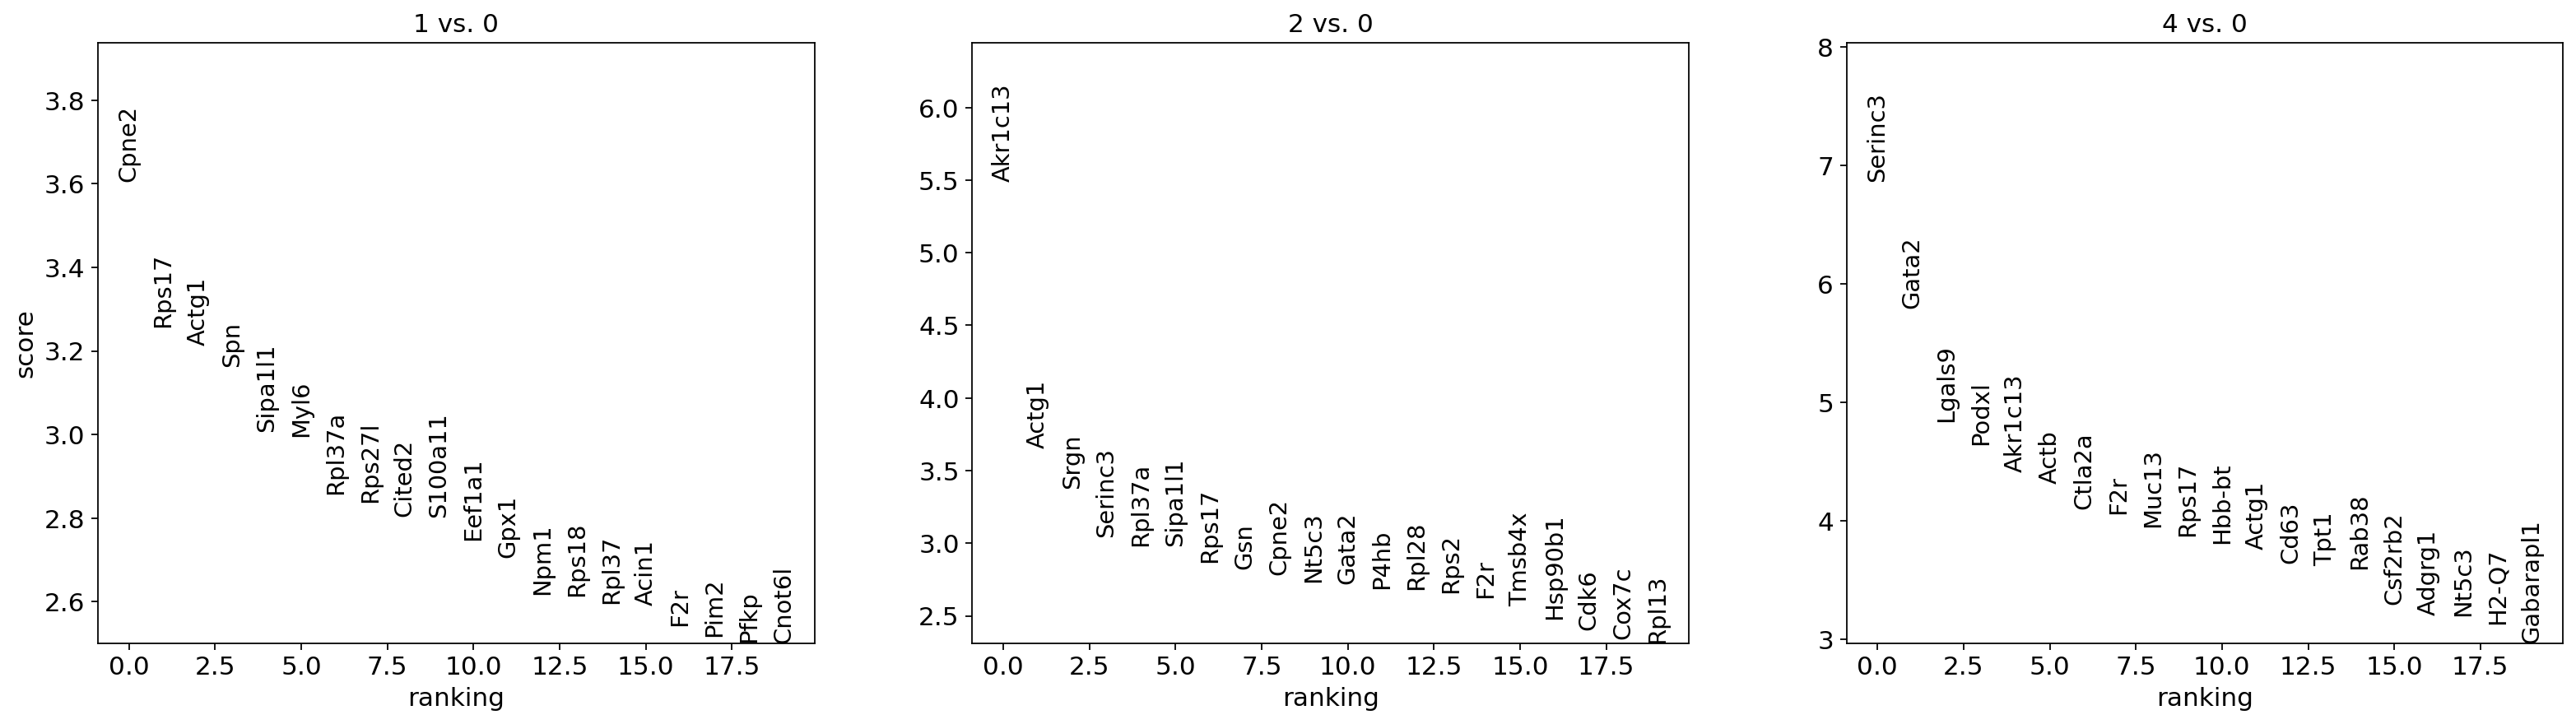

In [10]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
plt.rcParams['axes.grid'] = False
sc.tl.rank_genes_groups(adata_hsc, 'meta_clones', method='wilcoxon', groups=['1', '2', '4'], reference='0')
sc.pl.rank_genes_groups(adata_hsc, sharey=False, ncols=3, fontsize=13, save='1vs1degs')

In [11]:
df = pd.DataFrame(adata_hsc.uns['rank_genes_groups']['names'])
df.head(10)

,1,2,4
0,Cpne2,Akr1c13,Serinc3
1,Rps17,Actg1,Gata2
2,Actg1,Srgn,Lgals9
3,Spn,Serinc3,Podxl
4,Sipa1l1,Rpl37a,Akr1c13
5,Myl6,Sipa1l1,Actb
6,Rpl37a,Rps17,Ctla2a
7,Rps27l,Gsn,F2r
8,Cited2,Cpne2,Muc13
9,S100a11,Nt5c3,Rps17


In [ ]:
sc.set_figure_params(dpi_save=150, format='svg', figsize=(8, 6))
sc.pl.umap(adata, color=['Akr1c13', 'Gata2', 'Lgals9', 'Hbb-bt', 'Itga2b', 'Gzmb', 'Pbx1',
                         'Podxl', 'F2r', 'Csf2rb2', 'Serinc3'], ncols=4, save='1vs1degs')

### Volcano Plots

In [12]:
test = adata_hsc[adata_hsc.obs['meta_clones'].values == str(4), :]
refe = adata_hsc[adata_hsc.obs['meta_clones'].values == str(0), :]

/tmp/ipykernel_1983049/3255696993.py:8: RuntimeWarning: divide by zero encountered in divide
  fold_change = mean_test / mean_refe
/tmp/ipykernel_1983049/3255696993.py:8: RuntimeWarning: invalid value encountered in divide
  fold_change = mean_test / mean_refe
/tmp/ipykernel_1983049/3255696993.py:9: RuntimeWarning: divide by zero encountered in log2
  lfc = np.array(np.log2(fold_change)).squeeze()


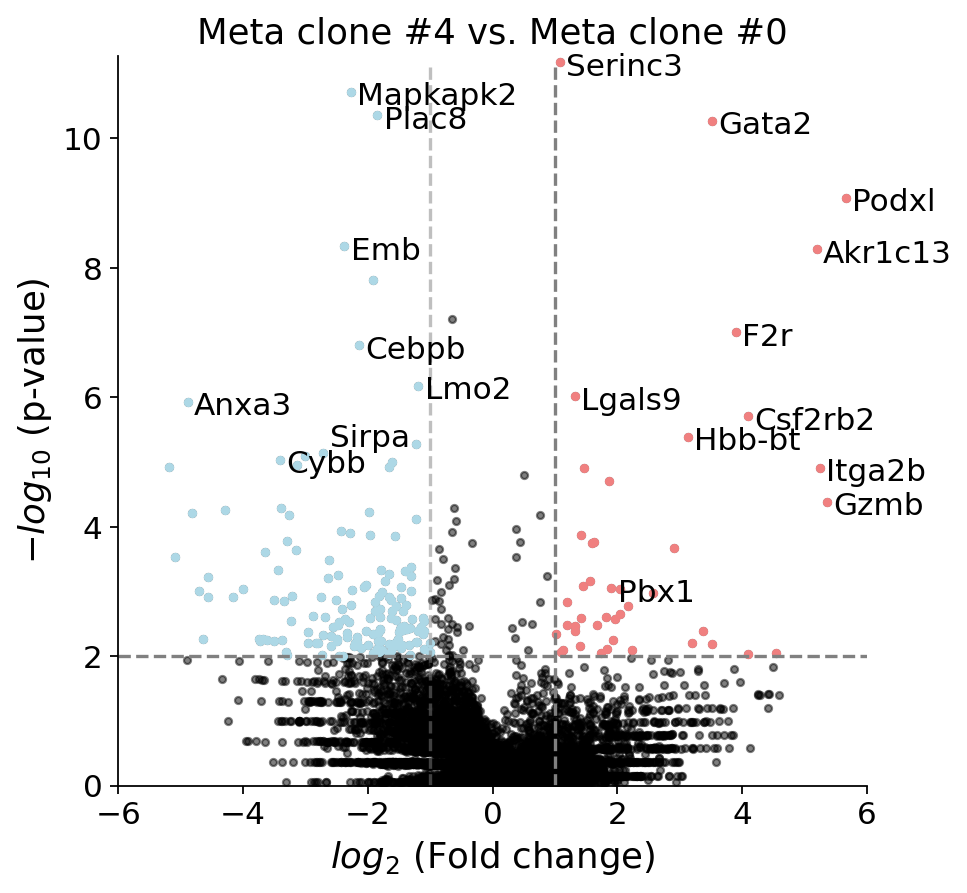

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

mean_test = np.mean(np.exp(test.raw.X.todense()) - 1, axis=0)
mean_refe = np.mean(np.exp(refe.raw.X.todense()) - 1, axis=0)

fold_change = mean_test / mean_refe
lfc = np.array(np.log2(fold_change)).squeeze()

t_statistic, p_values = stats.mannwhitneyu(test.raw.X.todense(), refe.raw.X.todense())
neg_log_10 = -np.log10(p_values)
threshold = 0.01

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.hlines(y=-np.log10(0.01), linestyles='dashed', xmin=-6, xmax=6, color='grey')
plt.scatter(lfc, neg_log_10, color='black', alpha=0.5, s=10)
plt.xlim([-6, 6])
plt.ylim([0, np.nanmax(neg_log_10) + 0.1])
plt.yticks(fontsize=14)

plt.vlines(x=-1, linestyles='dashed', ymin=0, ymax=np.nanmax(neg_log_10), color='grey', alpha=0.5)
plt.vlines(x=1, linestyles='dashed', ymin=0, ymax=np.nanmax(neg_log_10), color='grey')
plt.scatter(lfc[np.bitwise_and(lfc > 1, p_values < threshold)], neg_log_10[np.bitwise_and(lfc > 1, p_values < threshold)], color='lightcoral', s=10)
plt.scatter(lfc[np.bitwise_and(lfc < -1, p_values < threshold)], neg_log_10[np.bitwise_and(lfc < -1, p_values < threshold)], color='lightblue', s=10)

index = [20399, 7961, 18364, 2431, 7059, 13985, 5409, 12053, 13211, 11933, 17617]
names = ['Serinc3', 'Gata2', 'Podxl', 'Akr1c13', 'F2r', 'Lgals9', 'Csf2rb2', 'Hbb-bt', 'Itga2b', 'Gzmb', 'Pbx1']
for i in range(len(index)):
    plt.text(lfc[index[i]] + 0.1, neg_log_10[index[i]] - 0.2, names[i])

index = [2683,  4583,  5596,  6768, 14086, 14516, 18163]
names = ['Anxa3', 'Cebpb', 'Cybb', 'Emb', 'Lmo2', 'Mapkapk2', 'Plac8']
for i in range(len(index)):
    plt.text(lfc[index[i]] + 0.1, neg_log_10[index[i]] - 0.2, names[i])

plt.text(lfc[20645] + 0.1, neg_log_10[20645] + 0.1, 'Sirpa')

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

plt.xlabel('$log_{2}$ (Fold change)', fontsize=16)
plt.grid(False)
plt.ylabel('$-log_{10}$ (p-value)', fontsize=16)
plt.title('Meta clone #4 vs. Meta clone #0', fontsize=16)
plt.savefig(f'./volcano_meta2.svg', dpi=600, bbox_inches='tight', transparent=False, facecolor='white')

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(34, 8))
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
temp = adata[adata.obs.index[adata.obs['Meta clones'] != '1'], :]
color = ['#618CAC', '#B39FAB', '#FFC000', '#ED7D31', '#C5720B', '#B29E79']

for idx, gene in enumerate(['CEBPD', 'S100A11', 'MPO', 'MANF', 'HLA-DPB1', 'HLA-DPA1']):
    sc.pl.violin(adata_day3_hsc, gene, groupby='Meta clones', ax=axes[0][idx], show=False, palette=color)
    axes[0][idx].set_xlabel('')
    axes[0][idx].yaxis.grid(False)
    axes[0][idx].spines['top'].set_visible(False)
    axes[0][idx].spines['right'].set_visible(False)
for idx, gene in enumerate(['CEBPD', 'S100A11', 'MPO', 'MANF', 'HLA-DPB1', 'HLA-DPA1']):
    sc.pl.violin(temp, gene, groupby='Meta clones', ax=axes[1][idx], show=False, palette=color)
    axes[1][idx].set_xlabel('Meta clones', fontsize=16)
    axes[1][idx].yaxis.grid(False)
    axes[1][idx].spines['top'].set_visible(False)
    axes[1][idx].spines['right'].set_visible(False)

# plt.show()
plt.savefig(f'./hsc_degs.svg', dpi=600, bbox_inches='tight', transparent=False, facecolor='white')

In [ ]:
sc.set_figure_params(dpi_save=600, format='svg', figsize=(8, 6))
sc.pl.stacked_violin(adata_day3_hsc, df.head(5).T.values.flatten(), groupby='Meta clones', save=True)